# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Selenium Doc](https://www.selenium.dev/documentation/)
- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `Selenium` and `pandas` are imported for you.

In [6]:
%pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [243]:
import pandas as pd
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from IPython.display import Image, HTML
from PIL import Image
import requests
from io import BytesIO

#### Enable the options you may need. In the next cell you have an example of them but you can choose to use them or not.

In [244]:
#driver configuration
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)
opciones.headless=False    # si True, no aperece la ventana (headless=no visible)
opciones.add_argument('--start-maximized')         # comienza maximizado
#opciones.add_argument('user-data-dir=selenium')    # mantiene las cookies
#opciones.add_extension('driver_folder/adblock.crx')       # adblocker
opciones.add_argument('--incognito')

In [245]:
PATH=ChromeDriverManager().install()   # instala el driver

driver=webdriver.Chrome(PATH)         # abre una pestaña de chrome

driver.get('https://www.google.es')     # entra en google

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:02<00:00, 2.82MB/s]
C:\Users\tomas\AppData\Local\Temp\ipykernel_18880\445946255.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(PATH)         # abre una pestaña de chrome


#### Download, parse, and print the content from the Trending Developers page from GitHub:

In [19]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [23]:
driver.get(url)

In [72]:
nombres = [e.text for e in driver.find_elements(By.CLASS_NAME, 'col-md-6')] # Me quedo con nombre y nickname
developers = [e.replace('\n',' (@')+')' for e in nombres[0::2]] # Corrijo para que aparezca con @ y ()
developers

['Nikita Sobolev (@sobolevn)',
 'Emil Ernerfeldt (@emilk)',
 'Jonny Borges (@jonataslaw)',
 'Stephen Celis (@stephencelis)',
 'monkeyWie)',
 'Azure SDK Bot (@azure-sdk)',
 'Martin Bonnin (@martinbonnin)',
 'Wangchong Zhou (@fffonion)',
 'Ammar Ahmed (@ammarahm-ed)',
 'Matt Bierner (@mjbvz)',
 'Alessandro Ros (@aler9)',
 'Mike Perham (@mperham)',
 'DavidKorczynski)',
 'Abhijeet Prasad (@AbhiPrasad)',
 'Mislav Marohnić (@mislav)',
 'Leonard Hecker (@lhecker)',
 'Pedro Cuenca (@pcuenca)',
 'Marcus Olsson (@marcusolsson)',
 'Alex Eagle (@alexeagle)',
 'Nolan Lawson (@nolanlawson)',
 'Luke Latham (@guardrex)',
 'Joshua Levy (@jlevy)',
 'Bas Nijholt (@basnijholt)',
 'Ice3man (@Ice3man543)',
 'kunfei (@gedoor)']

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [73]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'

In [74]:
driver.get(url)

In [75]:
repos = [e.text for e in driver.find_elements(By.CLASS_NAME, 'h3.lh-condensed')] 
repos

['public-apis / public-apis',
 'bregman-arie / devops-exercises',
 'facebookresearch / fairseq',
 'cloneofsimo / paint-with-words-sd',
 'Azure / azure-cli',
 'caronc / apprise',
 'joweich / chat-miner',
 'PaddlePaddle / PaddleTS',
 'mli / autocut',
 'sczhou / CodeFormer',
 'unifyai / ivy',
 'augmentedstartups / AS-One',
 'loTus04 / W4SP-Stealer',
 'rwightman / pytorch-image-models',
 'iterativv / NostalgiaForInfinity',
 'getredash / redash',
 'ethereum / consensus-specs',
 'd8ahazard / sd_dreambooth_extension',
 'microsoft / recommenders',
 'zulip / zulip',
 'ultralytics / yolov5',
 'openai / improved-diffusion',
 'facebookresearch / ParlAI',
 'aliyun / surftrace',
 'NVlabs / stylegan2-ada-pytorch']

#### Display all the image links from Walt Disney wikipedia page

In [76]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [77]:
driver.get(url)

In [86]:
links_disney = [e.get_attribute('src') for e in driver.find_elements(By.TAG_NAME, 'img')]
links_disney

['https://upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/8/8c/Extended-protection-shackle.svg/20px-Extended-protection-shackle.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Trolley_Troubles_poster.jpg/170px-Trolley_Troubles_poster.jpg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/4/4e/Steamboat-willie.jp

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [87]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 

In [89]:
driver.get(url)

In [91]:
links_wiki = [e.get_attribute('href') for e in driver.find_elements(By.TAG_NAME, 'a')][1:]
links_wiki

['https://en.wikipedia.org/wiki/Python#mw-head',
 'https://en.wikipedia.org/wiki/Python#searchInput',
 'https://en.wiktionary.org/wiki/Python',
 'https://en.wiktionary.org/wiki/python',
 'https://en.wikipedia.org/wiki/Python#Snakes',
 'https://en.wikipedia.org/wiki/Python#Computing',
 'https://en.wikipedia.org/wiki/Python#People',
 'https://en.wikipedia.org/wiki/Python#Roller_coasters',
 'https://en.wikipedia.org/wiki/Python#Vehicles',
 'https://en.wikipedia.org/wiki/Python#Weaponry',
 'https://en.wikipedia.org/wiki/Python#Other_uses',
 'https://en.wikipedia.org/wiki/Python#See_also',
 'https://en.wikipedia.org/w/index.php?title=Python&action=edit&section=1&editintro=Template:Disambig_editintro',
 'https://en.wikipedia.org/wiki/Pythonidae',
 'https://en.wikipedia.org/wiki/Python_(genus)',
 'https://en.wikipedia.org/wiki/Python_(mythology)',
 'https://en.wikipedia.org/w/index.php?title=Python&action=edit&section=2&editintro=Template:Disambig_editintro',
 'https://en.wikipedia.org/wiki/P

#### Number of Titles that have changed in the United States Code since its last release point 

In [92]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [93]:
driver.get(url)

In [94]:
titles_changed = [e.text for e in driver.find_elements(By.CLASS_NAME, 'usctitlechanged')]
titles_changed

['Title 17 - Copyrights ٭',
 'Title 22 - Foreign Relations and Intercourse',
 "Title 38 - Veterans' Benefits ٭",
 'Title 40 - Public Buildings, Property, and Works ٭',
 'Title 41 - Public Contracts ٭',
 'Title 42 - The Public Health and Welfare',
 'Title 44 - Public Printing and Documents ٭',
 'Title 49 - Transportation ٭',
 'Title 54 - National Park Service and Related Programs ٭']

#### A Python list with the top ten FBI's Most Wanted names 

In [95]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten'

In [96]:
driver.get(url)

In [126]:
fbi = [e.text for e in driver.find_elements(By.CLASS_NAME, 'title')][1:]

In [111]:
img = [e.get_attribute('src') for e in driver.find_elements(By.TAG_NAME, 'img')][3:13]

OMAR ALEXANDER CARDENAS


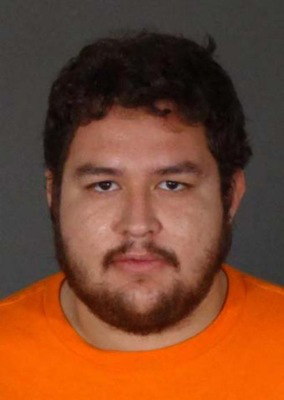



ALEXIS FLORES


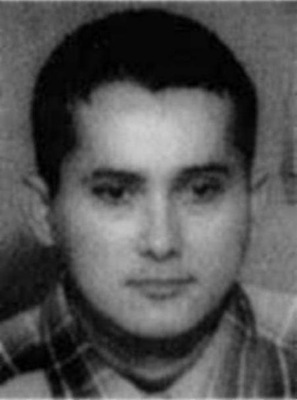



JOSE RODOLFO VILLARREAL-HERNANDEZ


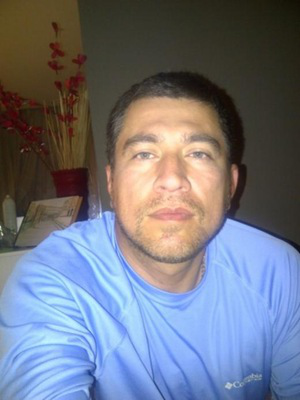



YULAN ADONAY ARCHAGA CARIAS


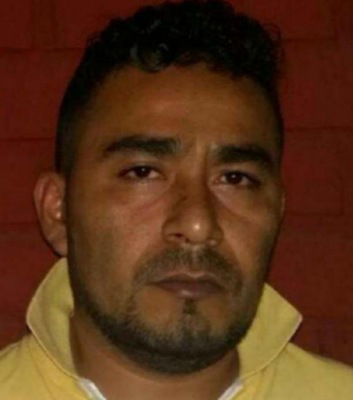



BHADRESHKUMAR CHETANBHAI PATEL


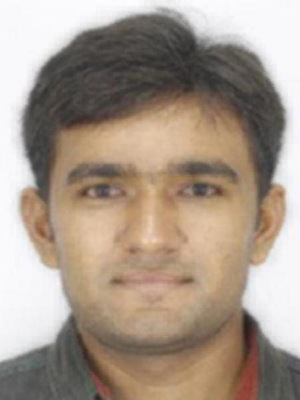



ALEJANDRO ROSALES CASTILLO


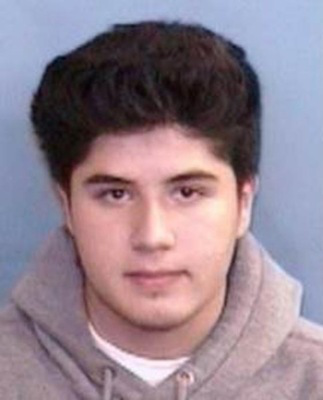



MICHAEL JAMES PRATT


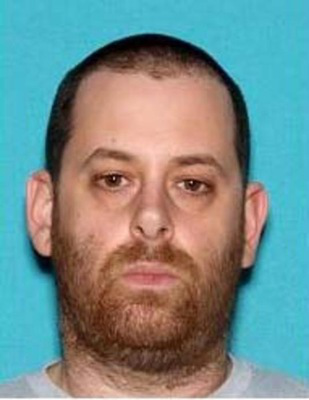



RUJA IGNATOVA


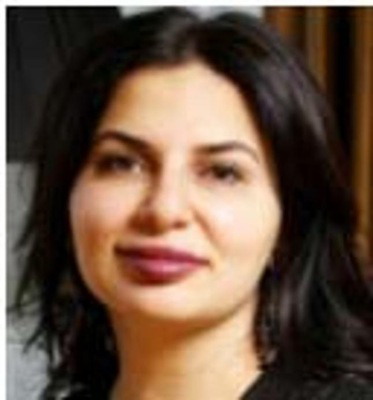



ARNOLDO JIMENEZ


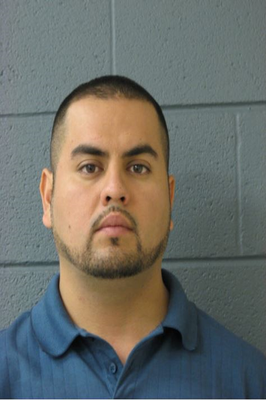



RAFAEL CARO-QUINTERO


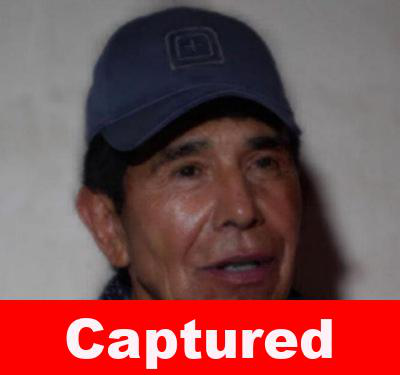

In [131]:
for i,e in enumerate(img):
    print(fbi[i]), display(Image.open(BytesIO(requests.get(e).content))), print('\n')

####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [132]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [133]:
driver.get(url)

In [158]:
data = [e.text.replace('6\nIII\n','').replace('1\nF\n','').replace('\n','  ').split('  ') for e in driver.find_elements(By.CLASS_NAME, 'ligne1.normal')]

In [162]:
df = pd.DataFrame(data, columns = ['date','time','time_ago','lat','N/S','long','W/E','depth_magn','loc'])
df # DataFrame sucio y con columnas separadas que van juntas

,date,time,time_ago,lat,N/S,long,W/E,depth_magn,loc
0,2022-11-09,16:43:54.0,16min ago,10.16,S,118.81,E,10 3.4,"SOUTH OF SUMBAWA, INDONESIA"
1,2022-11-09,16:38:20.0,21min ago,10.13,S,118.82,E,10 3.4,"SOUTH OF SUMBAWA, INDONESIA"
2,2022-11-09,16:07:15.2,52min ago,34.55,N,23.87,E,21 2.7,"CRETE, GREECE"
3,2022-11-09,15:40:34.6,1hr 19min ago,43.97,N,13.33,E,10 2.2,CENTRAL ITALY
4,2022-11-09,15:26:21.9,1hr 33min ago,44.01,N,13.28,E,26 2.4,ADRIATIC SEA
5,2022-11-09,15:06:55.0,1hr 53min ago,12.70,N,88.19,W,33 2.6,OFFSHORE EL SALVADOR
6,2022-11-09,14:51:54.6,2hr 08min ago,35.91,N,90.01,W,7 2.4,ARKANSAS
7,2022-11-09,14:10:53.7,2hr 49min ago,35.91,N,117.71,W,2 2.1,CENTRAL CALIFORNIA
8,2022-11-09,13:48:48.8,3hr 11min ago,40.16,N,119.14,W,8 2.6,NEVADA
9,2022-11-09,13:37:46.8,3hr 22min ago,43.95,N,13.31,E,9 2.6,CENTRAL ITALY


In [181]:
# LIMPIEZA 

df['time_ago'] = [e.replace(' ago','') for e in df['time_ago']]
df['latitude'] = df['lat']+' '+df['N/S']
df.drop(['lat','N/S'], axis=1, inplace=True)
df['longitude'] = df['long']+' '+df['W/E']
df.drop(['long','W/E'], axis=1, inplace=True)
df['depth'] = [e.split()[0] for e in df['depth_magn']]
df['magn'] = [e.split()[1] for e in df['depth_magn']]
df.drop(['depth_magn'], axis=1, inplace=True)
df = df[['date', 'time', 'time_ago', 'latitude','longitude', 'depth', 'magn', 'loc']] # Reordeno el dataframe
df

,date,time,time_ago,latitude,longitude,depth,magn,loc
0,2022-11-09,16:43:54.0,16min,10.16 S,118.81 E,10,3.4,"SOUTH OF SUMBAWA, INDONESIA"
1,2022-11-09,16:38:20.0,21min,10.13 S,118.82 E,10,3.4,"SOUTH OF SUMBAWA, INDONESIA"
2,2022-11-09,16:07:15.2,52min,34.55 N,23.87 E,21,2.7,"CRETE, GREECE"
3,2022-11-09,15:40:34.6,1hr 19min,43.97 N,13.33 E,10,2.2,CENTRAL ITALY
4,2022-11-09,15:26:21.9,1hr 33min,44.01 N,13.28 E,26,2.4,ADRIATIC SEA
5,2022-11-09,15:06:55.0,1hr 53min,12.70 N,88.19 W,33,2.6,OFFSHORE EL SALVADOR
6,2022-11-09,14:51:54.6,2hr 08min,35.91 N,90.01 W,7,2.4,ARKANSAS
7,2022-11-09,14:10:53.7,2hr 49min,35.91 N,117.71 W,2,2.1,CENTRAL CALIFORNIA
8,2022-11-09,13:48:48.8,3hr 11min,40.16 N,119.14 W,8,2.6,NEVADA
9,2022-11-09,13:37:46.8,3hr 22min,43.95 N,13.31 E,9,2.6,CENTRAL ITALY


#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

In [222]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [224]:
def busca_tweets(cuenta):
    try:
        driver.get(url+cuenta)
        time.sleep(2)
        return driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div/div/div/div/div/div[2]/div/div').text

    except:
        return 'No existe esta cuenta'

In [225]:
busca_tweets('Guaje7Villa')

'2.812 Tweets'

#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [205]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [211]:
def busca_followers(cuenta):
    try:
        driver.get(url+cuenta)
        time.sleep(2)
        seguidores = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[3]/div/div/div/div/div[5]/div[2]/a/span[1]/span').text
        return f'{seguidores} followers'

    except:
        return 'No existe esta cuenta'

In [226]:
busca_followers('Guaje7Villa')

'8,8 M followers'

#### List all language names and number of related articles in the order they appear in wikipedia.org

In [227]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [228]:
driver.get(url)

In [235]:
idiomas = [e.text for e in driver.find_elements(By.TAG_NAME, 'strong')][1:11]
idiomas

['Español',
 'English',
 '日本語',
 'Русский',
 'Français',
 'Deutsch',
 'Italiano',
 '中文',
 'Português',
 'العربية']

#### A list with the different kind of datasets available in data.gov.uk 

In [236]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [237]:
driver.get(url)

In [240]:
datasets = [e.text for e in driver.find_elements(By.CLASS_NAME, 'govuk-link')][4:]
datasets

['Business and economy',
 'Crime and justice',
 'Defence',
 'Education',
 'Environment',
 'Government',
 'Government spending',
 'Health',
 'Mapping',
 'Society',
 'Towns and cities',
 'Transport',
 'Digital service performance',
 'Government reference data']

#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [7]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [8]:
driver.get(url)

In [9]:
# Haciéndolo a lo bruto...
data = [e.text.replace('Mandarin Chinese','Mandarin_Chinese').replace('Yue Chinese','Yue_Chinese').replace('(incl. Standard Chinese, but excl. other varieties)','')
 .replace('\n','').replace('(excl. Urdu)','').replace('(incl. Cantonese)','').split()
 for e in driver.find_elements(By.TAG_NAME, 'tr')][1:11]

In [10]:
# Haciéndolo bien
raw_data = [e.text.replace('\n',' ') for e in driver.find_elements(By.TAG_NAME, 'td')][:40]

In [11]:
raw_data

['Mandarin Chinese (incl. Standard Chinese, but excl. other varieties)',
 '920',
 'Sino-Tibetan',
 'Sinitic',
 'Spanish',
 '475',
 'Indo-European',
 'Romance',
 'English',
 '373',
 'Indo-European',
 'Germanic',
 'Hindi (excl. Urdu)',
 '344',
 'Indo-European',
 'Indo-Aryan',
 'Bengali',
 '234',
 'Indo-European',
 'Indo-Aryan',
 'Portuguese',
 '232',
 'Indo-European',
 'Romance',
 'Russian',
 '154',
 'Indo-European',
 'Balto-Slavic',
 'Japanese',
 '125',
 'Japonic',
 'Japanese',
 'Yue Chinese (incl. Cantonese)',
 '85.2',
 'Sino-Tibetan',
 'Sinitic',
 'Vietnamese',
 '84.6',
 'Austroasiatic',
 'Vietic']

In [12]:
n = 4
data = [raw_data[i:i + n] for i in range(0, len(raw_data), n)] # Partimos la lista en listas de 4 elementos

In [13]:
columnas = [e.text.replace('\n',' ') for e in driver.find_elements(By.TAG_NAME, 'th')][:4]

In [19]:
df = pd.DataFrame(data, columns=columnas)
df['Language'] = [e.split(' (')[0] for e in df['Language']] # Limpiamos la columna de lenguaje quitando los paréntesis
df

,Language,Native speakers (millions),Language family,Branch
0,Mandarin Chinese,920,Sino-Tibetan,Sinitic
1,Spanish,475,Indo-European,Romance
2,English,373,Indo-European,Germanic
3,Hindi,344,Indo-European,Indo-Aryan
4,Bengali,234,Indo-European,Indo-Aryan
5,Portuguese,232,Indo-European,Romance
6,Russian,154,Indo-European,Balto-Slavic
7,Japanese,125,Japonic,Japanese
8,Yue Chinese,85.2,Sino-Tibetan,Sinitic
9,Vietnamese,84.6,Austroasiatic,Vietic


### BONUS QUESTIONS

#### Scrape a certain number of tweets of a given Twitter account.

In [4]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [5]:
# Se repite el ejercicio de antes
def busca_tweets(cuenta):
    try:
        driver.get(url+cuenta)
        time.sleep(2)
        return driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div/div/div/div/div/div[2]/div/div').text

    except:
        return 'No existe esta cuenta'

In [6]:
busca_tweets('Guaje7Villa')

'2.812 Tweets'

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [8]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [9]:
driver.get(url)

In [13]:
raw_data = [e.text for e in driver.find_elements(By.TAG_NAME, 'td')]

In [22]:
print(raw_data) # Datos sucios

['', '1. Cadena perpetua (1994)', '9,2', '', '', '', '2. El padrino (1972)', '9,2', '', '', '', '3. El caballero oscuro (2008)', '9,0', '', '', '', '4. El padrino (parte II) (1974)', '9,0', '', '', '', '5. 12 hombres sin piedad (1957)', '9,0', '', '', '', '6. La lista de Schindler (1993)', '8,9', '', '', '', '7. El señor de los anillos: El retorno del rey (2003)', '8,9', '', '', '', '8. Pulp Fiction (1994)', '8,8', '', '', '', '9. El señor de los anillos: La comunidad del anillo (2001)', '8,8', '', '', '', '10. El bueno, el feo y el malo (1966)', '8,8', '', '', '', '11. Forrest Gump (1994)', '8,8', '', '', '', '12. El club de la lucha (1999)', '8,7', '', '', '', '13. El señor de los anillos: Las dos torres (2002)', '8,7', '', '', '', '14. Origen (2010)', '8,7', '', '', '', '15. El Imperio contraataca (1980)', '8,7', '', '', '', '16. Matrix (1999)', '8,7', '', '', '', '17. Uno de los nuestros (1990)', '8,7', '', '', '', '18. Alguien voló sobre el nido del cuco (1975)', '8,6', '', '', ''

In [20]:
n = 5
data = [raw_data[i:i + n] for i in range(0, len(raw_data), n)] # Parto la lista en listas de 5 elementos
data

[['', '1. Cadena perpetua (1994)', '9,2', '', ''],
 ['', '2. El padrino (1972)', '9,2', '', ''],
 ['', '3. El caballero oscuro (2008)', '9,0', '', ''],
 ['', '4. El padrino (parte II) (1974)', '9,0', '', ''],
 ['', '5. 12 hombres sin piedad (1957)', '9,0', '', ''],
 ['', '6. La lista de Schindler (1993)', '8,9', '', ''],
 ['', '7. El señor de los anillos: El retorno del rey (2003)', '8,9', '', ''],
 ['', '8. Pulp Fiction (1994)', '8,8', '', ''],
 ['',
  '9. El señor de los anillos: La comunidad del anillo (2001)',
  '8,8',
  '',
  ''],
 ['', '10. El bueno, el feo y el malo (1966)', '8,8', '', ''],
 ['', '11. Forrest Gump (1994)', '8,8', '', ''],
 ['', '12. El club de la lucha (1999)', '8,7', '', ''],
 ['', '13. El señor de los anillos: Las dos torres (2002)', '8,7', '', ''],
 ['', '14. Origen (2010)', '8,7', '', ''],
 ['', '15. El Imperio contraataca (1980)', '8,7', '', ''],
 ['', '16. Matrix (1999)', '8,7', '', ''],
 ['', '17. Uno de los nuestros (1990)', '8,7', '', ''],
 ['', '18. Al

In [38]:
data_ok = [e[1:3] for e in data] # Me quedo solo con los elemenos que me interesan de cada lista
df = pd.DataFrame(data_ok, columns=['peli','IMDb Rating'])
df.head()

,peli,IMDb Rating
0,1. Cadena perpetua (1994),"9,2"
1,2. El padrino (1972),"9,2"
2,3. El caballero oscuro (2008),"9,0"
3,4. El padrino (parte II) (1974),"9,0"
4,5. 12 hombres sin piedad (1957),"9,0"


In [43]:
# Arreglamos un poco el data frame
df['rank'] = [e.split('.')[0] for e in df['peli']]
df['title'] = [e.split('.')[1] for e in df['peli']]
df = df[['rank', 'title', 'IMDb Rating', 'peli']]
df.drop('peli', axis=1, inplace=True)
df.set_index('rank', inplace=True) # No me gusta el índice desde 0, pongo el rank como índice
df

,title,IMDb Rating
rank,,
1,Cadena perpetua (1994),"9,2"
2,El padrino (1972),"9,2"
3,El caballero oscuro (2008),"9,0"
4,El padrino (parte II) (1974),"9,0"
5,12 hombres sin piedad (1957),"9,0"
...,...,...
246,Dersu Uzala (El cazador) (1975),"8,0"
247,Aladdín (1992),"8,0"
248,Criadas y señoras (2011),"8,0"


#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [114]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [115]:
driver.get(url)

In [116]:
raw_data = [e.text for e in driver.find_elements(By.TAG_NAME, 'a')]

In [117]:
titulos = raw_data[56::2][:10] # Me quedo con top10 títulos, desde el tag 56, que es donde empiezan las pelis
titulos

['El padrino',
 'El caballero oscuro',
 'El padrino (parte II)',
 '12 hombres sin piedad',
 'La lista de Schindler',
 'El señor de los anillos: El retorno del rey',
 'Pulp Fiction',
 'El señor de los anillos: La comunidad del anillo',
 'El bueno, el feo y el malo',
 'Forrest Gump']

In [119]:
años = [e.text for e in driver.find_elements(By.CLASS_NAME, 'secondaryInfo')][:10]
años

['(1994)',
 '(1972)',
 '(2008)',
 '(1974)',
 '(1957)',
 '(1993)',
 '(2003)',
 '(1994)',
 '(2001)',
 '(1966)']

In [96]:
raw_data = [e.get_attribute('href') for e in driver.find_elements(By.TAG_NAME, 'a')]
raw_data

In [98]:
links = raw_data[53::2][:10] # Saco los links de las películas para entrar en cada uno y quedarme la sinopsis

In [107]:
link_prueba = 'https://www.imdb.com/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=N9TJ7ZKKDVKH3X4XQ8HZ&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1'
driver.get(link_prueba)
time.sleep(1)
sinopsis = [e.text for e in driver.find_elements(By.TAG_NAME, 'p')][0]
sinopsis

'Andy Dufresne es encarcelado por matar a su esposa y al amante de esta. Tras una dura adaptación, intenta mejorar las condiciones de la prisión y dar esperanza a sus compañeros.'

In [108]:
summary = []
for li in links:
    driver.get(li)
    time.sleep(1)
    sinopsis = [e.text for e in driver.find_elements(By.TAG_NAME, 'p')][0]
    summary.append(sinopsis)
summary

['Andy Dufresne es encarcelado por matar a su esposa y al amante de esta. Tras una dura adaptación, intenta mejorar las condiciones de la prisión y dar esperanza a sus compañeros.',
 'El envejecido patriarca de una dinastía del crimen organizado en la ciudad de Nueva York de la posguerra transfiere el control de su imperio clandestino a su reacio hijo menor.',
 'Cuando la amenaza conocida como el Joker causa estragos y el caos en Gotham City, Batman debe aceptar una de las mayores pruebas psicológicas y físicas para luchar contra la injusticia.',
 'Se retratan los inicios de la vida y la carrera de Vito Corleone en el Nueva York de los años 20, mientras su hijo, Michael, amplía y refuerza su control sobre el sindicato del crimen famili... Leer todo',
 'Un miembro del jurado trata de evitar un error judicial obligando al resto del jurado a reconsiderar las pruebas.',
 'En la Polonia ocupada por los alemanes durante la Segunda Guerra Mundial, el industrial Oskar Schindler se preocupa por

In [120]:
df = pd.DataFrame(list(zip(titulos, años, summary)), columns =['title', 'year', 'summary'])
df

,title,year,summary
0,El padrino,(1994),Andy Dufresne es encarcelado por matar a su es...
1,El caballero oscuro,(1972),El envejecido patriarca de una dinastía del cr...
2,El padrino (parte II),(2008),Cuando la amenaza conocida como el Joker causa...
3,12 hombres sin piedad,(1974),Se retratan los inicios de la vida y la carrer...
4,La lista de Schindler,(1957),Un miembro del jurado trata de evitar un error...
5,El señor de los anillos: El retorno del rey,(1993),En la Polonia ocupada por los alemanes durante...
6,Pulp Fiction,(2003),Gandalf y Aragorn lideran el mundo de los homb...
7,El señor de los anillos: La comunidad del anillo,(1994),"Las vidas de dos mafiosos, un boxeador, la esp..."
8,"El bueno, el feo y el malo",(2001),Un hobbit de la Comarca y ocho compañeros empr...
9,Forrest Gump,(1966),"Durante la Guerra de Secesión, tres cazarrecom..."


#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [126]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
    url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

Enter the city:Valencia


In [190]:
# Necesita API Key nos olvidamos de ella
# Plan B: Usamos la web de eltiempo.es

In [129]:
driver.get(url)

In [191]:
def el_tiempo(ciudad):
    
    try:
        url = 'https://www.eltiempo.es/'+ciudad+'.html' # Contruímos url con la ciudad insertada
        driver.get(url) # Buscamos esa ciudad
        time.sleep(1)
        
        temp = driver.find_element(By.XPATH, '//*[@id="headerCity"]/div[2]/section/div[1]/section[1]/span').text
        viento = driver.find_element(By.XPATH, '//*[@id="headerCity"]/div[2]/section/div[1]/section[2]/p/span').text
        cielo = driver.find_element(By.XPATH, '//*[@id="headerCity"]/div[2]/section/div[2]/span').text
        ultima_actualizacion = driver.find_element(By.XPATH, '//*[@id="headerCity"]/div[2]/section/div[2]/div/span').text.split()[1]
        
        data = [[ciudad,temp, viento, cielo, ultima_actualizacion]] # Creo una lista de listas para crear el df
        
        return pd.DataFrame(data=data, columns=['ciudad','temperatura', 'viento', 'cielo', 'ultima_actualización'])
        
    except:
        return 'Esa ciudad no se encuentra'

In [192]:
el_tiempo('Madrid')

,ciudad,temperatura,viento,cielo,ultima_actualización
0,Madrid,9°,5 km/h,Despejado,11:15


#### Book name,price and stock availability as a pandas dataframe.

In [193]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [194]:
driver.get(url)

In [214]:
[e.text for e in driver.find_elements(By.TAG_NAME, 'h3')] # Los títulos salen muchas veces con puntos suspensivos. Plan B!

['A Light in the ...',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History ...',
 'The Requiem Red',
 'The Dirty Little Secrets ...',
 'The Coming Woman: A ...',
 'The Boys in the ...',
 'The Black Maria',
 'Starving Hearts (Triangular Trade ...',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little ...",
 'Rip it Up and ...',
 'Our Band Could Be ...',
 'Olio',
 'Mesaerion: The Best Science ...',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [216]:
titulos = [e.get_attribute('alt') for e in driver.find_elements(By.TAG_NAME, 'img')] # Los saco del atributo "alt" de img

In [234]:
raw_data = [e.get_attribute('class') for e in driver.find_elements(By.TAG_NAME, 'p')][::3] # Saco el rating
rating = [e.split()[1] for e in raw_data]
print(rating)

['Three', 'One', 'One', 'Four', 'Five', 'One', 'Four', 'Three', 'Four', 'One', 'Two', 'Four', 'Five', 'Five', 'Five', 'Three', 'One', 'One', 'Two', 'Two']


In [212]:
stars = []
for e in rating:
    if e == 'One':
        stars.append(1)
    elif e == 'Two':
        stars.append(2)
    elif e == 'Tree':
        stars.append(3)
    elif e == 'Four':
        stars.append(4)
    else:
        stars.append(5)
stars

[5, 1, 1, 4, 5, 1, 4, 5, 4, 1, 2, 4, 5, 5, 5, 5, 1, 1, 2, 2]

In [219]:
precio = [e.text for e in driver.find_elements(By.CLASS_NAME, 'price_color')]

In [223]:
stock = [e.text for e in driver.find_elements(By.CLASS_NAME, 'instock.availability')]

In [230]:
data = [titulos,precio,stars,stock]

In [232]:
df = pd.DataFrame()
df['title'] = titulos
df['price'] = precio
df['stars'] = stars
df['stock'] = stock
df

,title,price,stars,stock
0,A Light in the Attic,£51.77,5,In stock
1,Tipping the Velvet,£53.74,1,In stock
2,Soumission,£50.10,1,In stock
3,Sharp Objects,£47.82,4,In stock
4,Sapiens: A Brief History of Humankind,£54.23,5,In stock
5,The Requiem Red,£22.65,1,In stock
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,4,In stock
7,The Coming Woman: A Novel Based on the Life of...,£17.93,5,In stock
8,The Boys in the Boat: Nine Americans and Their...,£22.60,4,In stock
9,The Black Maria,£52.15,1,In stock


In [201]:
# Y si nos motivamos y añadimos las imágenes de los libros?

image_links = [e.get_attribute('src') for e in driver.find_elements(By.TAG_NAME, 'img')]

In [237]:
image_links

['http://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'http://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'http://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg',
 'http://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg',
 'http://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg',
 'http://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg',
 'http://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg',
 'http://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg',
 'http://books.toscrape.com/media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg',
 'http://books.toscrape.com/media/cache/58/46/5846057e28022268153beff6d352b06c.jpg',
 'http://books.toscrape.com/media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg',
 'http://books.toscrape.com/media/cache/10/48/1048f63d3b5061cd2f4

In [242]:
from IPython.core.display import display,HTML

# your images
images1 = image_links

df['imagenes'] = images1


# convert your links to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', None)

image_cols = ['imagenes']  #<- define which columns will be used to convert to html

# Create the dictionariy to be passed as formatters
format_dict = {}
for image_col in image_cols:
    format_dict[image_col] = path_to_image_html


display(HTML(df.to_html(escape=False ,formatters=format_dict)))

C:\Users\tomas\AppData\Local\Temp\ipykernel_18880\3864289999.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


,title,price,stars,stock,imagenes
0,A Light in the Attic,£51.77,5,In stock,
1,Tipping the Velvet,£53.74,1,In stock,
2,Soumission,£50.10,1,In stock,
3,Sharp Objects,£47.82,4,In stock,
4,Sapiens: A Brief History of Humankind,£54.23,5,In stock,
5,The Requiem Red,£22.65,1,In stock,
6,The Dirty Little Secrets of Getting Your Dream Job,£33.34,4,In stock,
7,"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",£17.93,5,In stock,
8,The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,£22.60,4,In stock,
9,The Black Maria,£52.15,1,In stock,
